In [1]:
import pandas as pd
import numpy as np

import datetime
import seaborn as sns
from matplotlib import rcParams
import matplotlib.pyplot as plt
# figure size in inches
rcParams['figure.figsize'] = 30,8

In [5]:
df_sales = pd.read_excel('data/raw_data/raw_sales.xlsx')

In [6]:
df_sales.head()

,date,total_sales
0,Lunes 21/09/2015,233.00
1,Martes 22/09/2015,95.80
2,Miércoles 23/09/2015,156.50
3,Jueves 24/09/2015,141.80
4,Viernes 25/09/2015,1095.15


In [7]:
df_sales.dtypes

date            object
total_sales    float64
dtype: object

In [8]:
df_sales['clean_date'] = df_sales['date'].str.split(' ').str[-1]

In [9]:
df_sales['day_of_week'] = df_sales['date'].str.split(' ').str[0]

In [10]:
df_sales['date'] = pd.to_datetime(df_sales['clean_date'], errors='coerce',format='%d/%m/%Y')

In [11]:
df_sales

,date,total_sales,clean_date,day_of_week
0,2015-09-21,233.00,21/09/2015,Lunes
1,2015-09-22,95.80,22/09/2015,Martes
2,2015-09-23,156.50,23/09/2015,Miércoles
3,2015-09-24,141.80,24/09/2015,Jueves
4,2015-09-25,1095.15,25/09/2015,Viernes
...,...,...,...,...
1942,2021-05-07,2154.00,07/05/2021,Viernes
1943,2021-05-08,6241.70,08/05/2021,Sábado
1944,2021-05-09,6611.10,09/05/2021,Domingo
1945,2021-05-10,946.40,10/05/2021,Lunes


In [12]:
df_sales.dtypes


date           datetime64[ns]
total_sales           float64
clean_date             object
day_of_week            object
dtype: object

In [13]:
df_sales.isnull().sum()

date           0
total_sales    0
clean_date     0
day_of_week    0
dtype: int64

In [14]:
del df_sales['clean_date']
del df_sales['day_of_week']


In [15]:
df_sales.head()

,date,total_sales
0,2015-09-21,233.00
1,2015-09-22,95.80
2,2015-09-23,156.50
3,2015-09-24,141.80
4,2015-09-25,1095.15


In [16]:
df_sales.head()

,date,total_sales
0,2015-09-21,233.00
1,2015-09-22,95.80
2,2015-09-23,156.50
3,2015-09-24,141.80
4,2015-09-25,1095.15


In [17]:
#List all my missing dates
pd.date_range(start = '2015-09-21', end = '2021-05-11').difference(df_sales.date)

DatetimeIndex(['2015-10-20', '2015-10-21', '2015-10-22', '2015-10-23',
               '2015-10-24', '2015-10-25', '2015-10-26', '2015-10-27',
               '2015-10-28', '2015-10-29',
               ...
               '2020-06-17', '2020-06-18', '2020-06-19', '2020-06-20',
               '2020-06-21', '2020-06-22', '2020-06-23', '2020-06-24',
               '2020-06-25', '2021-01-09'],
              dtype='datetime64[ns]', length=113, freq=None)

In [18]:
#fill in missing dates
r = pd.date_range(start=df_sales.date.min(), end=df_sales.date.max())
df_sales = df_sales.set_index('date').reindex(r).fillna(0.0).rename_axis('date').reset_index()

In [19]:
#f_sales[df_sales.total_sales < 0] = 0
df_sales['total_sales'] = df_sales['total_sales'].clip(lower=0,axis = 0)

In [20]:
df_sales["day_of_week"] = df_sales.date.dt.day_name()
df_sales["month_name"] = df_sales.date.dt.month_name()
df_sales["day"] = df_sales.date.dt.day
df_sales["year"] = df_sales.date.dt.year



In [21]:
df_sales = df_sales.set_index("date")
df_sales

,total_sales,day_of_week,month_name,day,year
date,,,,,
2015-09-21,233.00,Monday,September,21,2015
2015-09-22,95.80,Tuesday,September,22,2015
2015-09-23,156.50,Wednesday,September,23,2015
2015-09-24,141.80,Thursday,September,24,2015
2015-09-25,1095.15,Friday,September,25,2015
...,...,...,...,...,...
2021-05-07,2154.00,Friday,May,7,2021
2021-05-08,6241.70,Saturday,May,8,2021
2021-05-09,6611.10,Sunday,May,9,2021


In [22]:
df_sales.index.is_all_dates

<ipython-input-22-831b2aea967e>:1: FutureWarning: Index.is_all_dates is deprecated, will be removed in a future version.  check index.inferred_type instead
  df_sales.index.is_all_dates


True

In [23]:
pd.infer_freq(df_sales.index)

'D'

Visuals

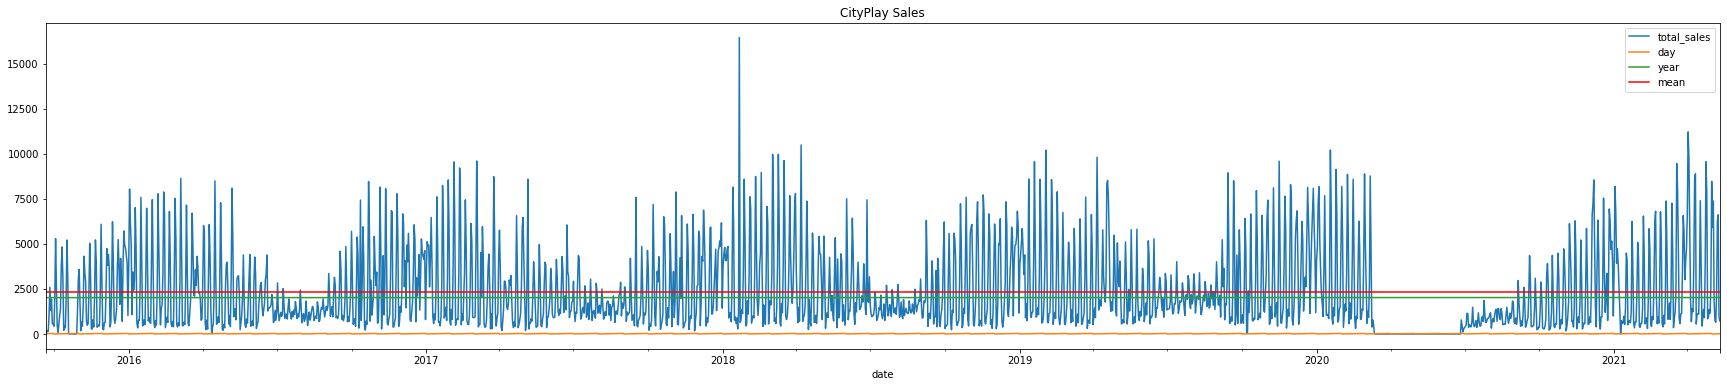

In [24]:
df_sales.plot(figsize=(30, 6))
plt.title("CityPlay Sales")
plt.axhline(df_sales.total_sales.mean(), c="r", label="mean")
plt.legend();

In [25]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [26]:
df_sales


,total_sales,day_of_week,month_name,day,year
date,,,,,
2015-09-21,233.00,Monday,September,21,2015
2015-09-22,95.80,Tuesday,September,22,2015
2015-09-23,156.50,Wednesday,September,23,2015
2015-09-24,141.80,Thursday,September,24,2015
2015-09-25,1095.15,Friday,September,25,2015
...,...,...,...,...,...
2021-05-07,2154.00,Friday,May,7,2021
2021-05-08,6241.70,Saturday,May,8,2021
2021-05-09,6611.10,Sunday,May,9,2021


In [27]:
res = seasonal_decompose(df_sales.total_sales, model="additive")

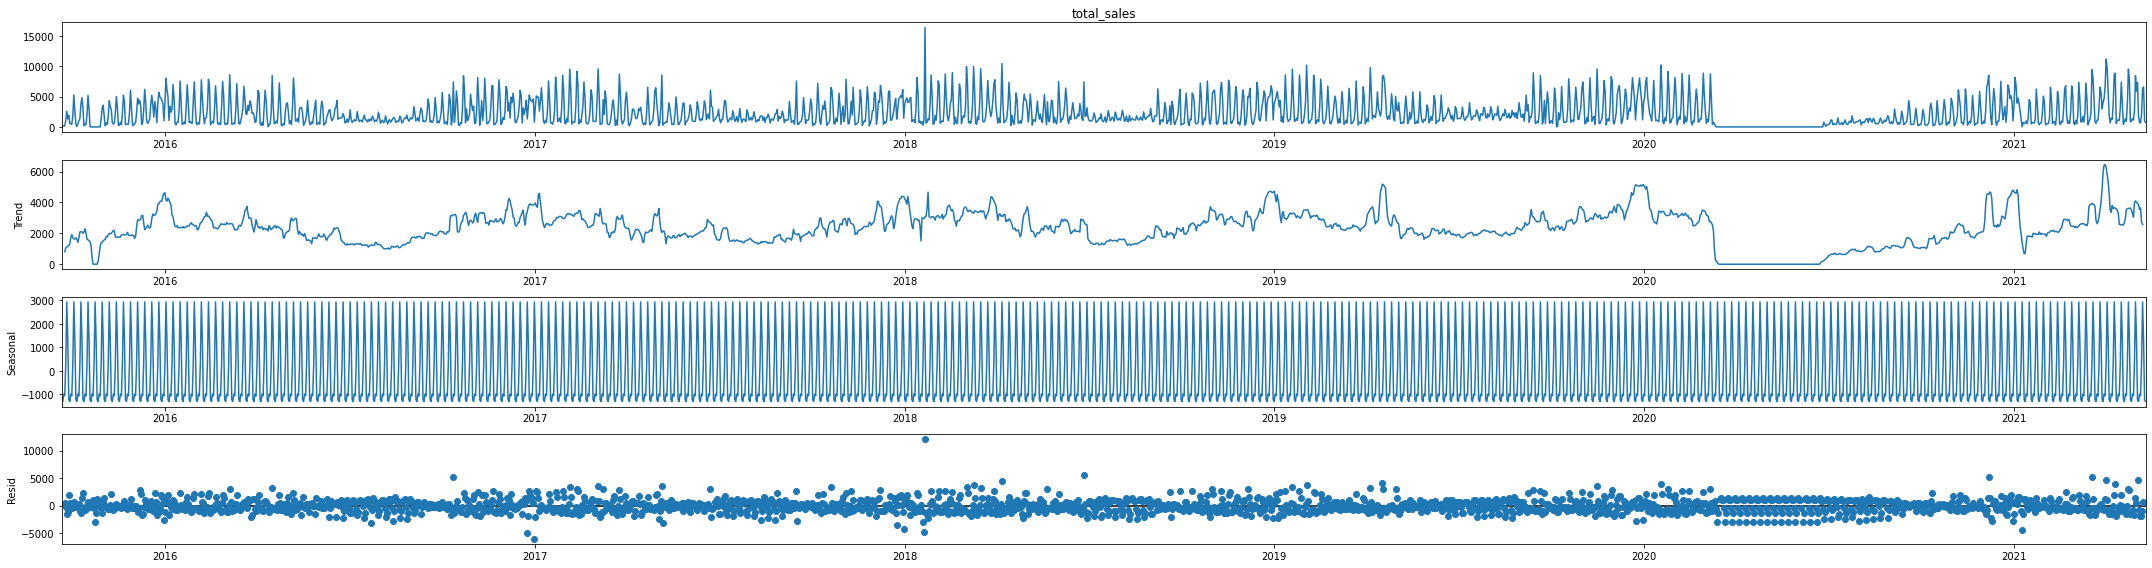

In [28]:
res.plot();

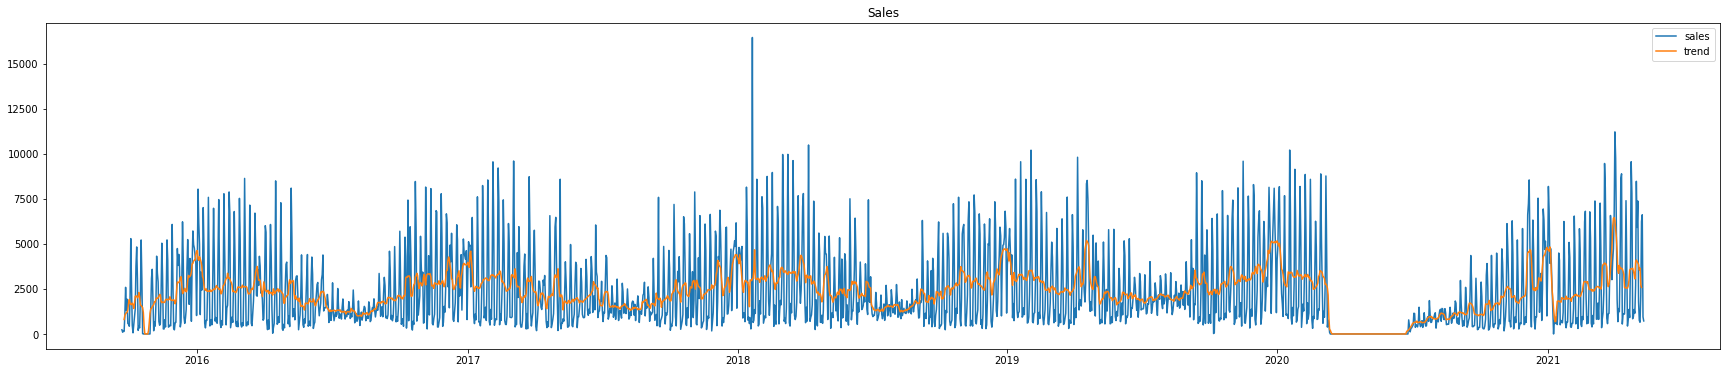

In [29]:
plt.figure(figsize=(30,6))
plt.title("Sales")

plt.plot(df_sales["total_sales"], label="sales")

plt.plot(res.trend, label="trend")

#plt.plot(res.seasonal, label="seasonal")

# plt.plot(res.resid, label="residual")

plt.legend();

In [30]:
from statsmodels.tsa.stattools import adfuller
res = adfuller(df_sales["total_sales"])
res

(-3.235184305139061,
 0.018036292907546346,
 26,
 2033,
 {'1%': -3.4335706473104777,
  '5%': -2.862962721261273,
  '10%': -2.567527393852395},
 34539.64325443149)

In [31]:
adf, pvalue, usedlag, nobs, critical_values, icbest = res

In [32]:
# Our test statistic
adf

-3.235184305139061

In [33]:
# The critical values for different confidence intervals (How strict we are)
critical_values

{'1%': -3.4335706473104777,
 '5%': -2.862962721261273,
 '10%': -2.567527393852395}

In [34]:
pvalue

0.018036292907546346

In [35]:
df_sales.to_csv("data/raw_data/sales_clean.csv" , index=True)